![Colab](https://www.tensorflow.org/images/colab_logo_32px.png) [Run in Google Colab](https://colab.research.google.com/drive/1-UK0wqipauqrJIvSvxWZfRlsKKgma6yM?usp=sharing) ![GitHub](https://www.tensorflow.org/images/GitHub-Mark-32px.png) [View source on GitHub](https://github.com/TanyaYu/Curriculum-Project/blob/master/colab_experiments/Test_Import.ipynb)

# Colab Investigation

Goals:
- [x] Check if Colab could be used as a resource to share lab materials with students. All copies of the notebook must have the same version of the TensorFlow.
- [x] Find the best way to make the dataset available in Colab.

# TensorFlow Version in Colab
Default version TensorFlow in Colab was switched to 2.x not a long time ago. Right now it's set to 2.2.0.

A specific version can be installed by using `pip install` command. Keep in mind that it might require a runtime restart after installation. If you choose to use a specific version in your notebook it has to be installed in your notebook environment every time you restart runtime. 

To check TensorFlow version in your current Colab notebook environment run `tf.__version__ `

In [ ]:
!pip install tensorflow==2.2.0

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

# Data Source Import
I found 3 ways to import a dataset in a Colab notebook:
1. Direct files upload
2. Export from Google Drive 
3. Using external data sources 

Pros and cons of each method are included.

In [ ]:
# This function plots images from a folder. I use it to test if 
# data source import was executed correctly. 

import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def plot_images(source_path):
  files=[]
  classes = glob.glob(source_path + '/*')
  for class_path in classes:
      files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])
  plt.figure(figsize=(16, 8))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      img = image.load_img(files[i], target_size=(32, 64))
      plt.imshow(img, cmap=plt.cm.binary)
  plt.show()

## Files Upload
This is a very easy and straightforward way. The idea is to upload a data source file that is located on your computer to the notebook content files.

**Workflow**  
1.   Upload files using `files` module form `google.colab`
2.   Unzip the file if necessary
3.   The contents will be located in `/content` folder of the notebook

**Advantages**
*   The data source ownership. The file can be easily modified or corrected locally by any notebook user. Users can use their own data sources too.
*   Suitable for small datasets.

**Disadvantages**
*   The notebook can't function without the data source file. The notebook and the data source file can't be separated. 
*   Not suitable for large datasets. Upload time for such datasets is very long not talking about that upload has to be done every time the runtime is restarted. 

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
!unzip example.zip

In [ ]:
plot_images("/content/example")

## Google Drive
This method allows you to access your files directly from your Google Drive account.

**Workflow**  
1.   Upload the data source file in your Google Drive account.
2.   Mount your Google Drive account using `drive` module form `google.colab`. You will be asked to log into your account and give permission to read and alter your files. Copy and provide an API key to the Colab notebook for a successful mount.
3.   All contents of your Drive account will be available in `/content/gdrive/My Drive` folder of the notebook.

**Advantages**
*   The data source ownership. The file can be easily modified or corrected locally by any notebook user. Users can use their own data sources too.
*   Suitable for large datasets. The data source has to be uploaded to the drive only once. When the runtime is restarted you only need to reconnect to your account without having to spend a long time uploading a large dataset.

**Disadvantages**
*   You can mount only your Google Drive accounts but not someone else's. That means that every user of the notebook must have a valid data source file pre-uploaded to their accounts.
*   I found it annoying that I have to re-grant permission to mount my drive account every time I restart the runtime. It requires tedious manual operations in case of notebook failures.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
plot_images("/content/gdrive/My Drive/example")

##  External Data Stores
The idea is to store a data source file in a cloud service and provide a simple URL link to this file. Examples of such are *Amazon S3 Bucket*, *Google Cloud Platform*, etc. In this example I demonstrate the use of Google Cloud Platform.

**Workflow for the file owner**  
1.   Choose a project in your GCP account (or create one if you don't have any). Navigate to Storage through main menu.
![storage](https://storage.googleapis.com/vehicle-dataset/create-bucket-instructions/storage.png)
2.   Create a bucket in this project. Check the bucket permissions and access. The bucket name must be unique. You will also be asked where to store your data, storage class, and how to control access to objects.
![create](https://storage.googleapis.com/vehicle-dataset/create-bucket-instructions/create%20bucket.png)
![new](https://storage.googleapis.com/vehicle-dataset/create-bucket-instructions/new.png)
3. Upload files to the bucket using Upload files button or drag and drop. 
![upload](https://storage.googleapis.com/vehicle-dataset/create-bucket-instructions/upload.png)
4. Check the file permissions and access. Manage file permissions by clicking Edit permissions context menu. If you want to make the file publicaly available create `allUsers` access group with reader permission.
![edit permissions](https://storage.googleapis.com/vehicle-dataset/create-bucket-instructions/edit%20permissions.png)
![allUsers](https://storage.cloud.google.com/vehicle-dataset/create-bucket-instructions/make%20public.png?supportedpurview=project)

**Workflow for the file user**  
1.   You will need to know the unique bucket name and the file name.
2.   Copy the file from the cloud to your notebook environment by using `gsutil cp` command.
3. Unzip the file if necessary.
4.   You can find the contents in `/content` folder of the notebook.

OR

Use `tensorflow.keras.utils.get_file` function to download the file from the URL source, where the URL is `https://storage.googleapis.com/{bucket_name}/{file_name}`

**Advantages**
*   No need to keep the data source file locally. The notebook can function without the file that makes it easily distributed.
*   Cleaner code. No tedious manual uploads.

**Disadvantages**
*   The owner of the file must maintain the file in the cloud, make sure that it is available and has proper permissions, etc.
*   The notebook users don't own the data source file. Although if they want to alter it they can download the file locally and use direct file upload or mount google drive method to use a new version in the notebook. 

In [ ]:
# this bucket is created in my personal GCP account
bucket_name = "vehicle-dataset"
file_name = "example.zip"

In [ ]:
!gsutil cp gs://{bucket_name}/{file_name} /content/example.zip

Copying gs://vehicle-dataset/example.zip...
/ [1 files][  1.1 MiB/  1.1 MiB]                                                
Operation completed over 1 objects/1.1 MiB.                                      


In [ ]:
# delete the example folder if it alredy exists
# !rm -rf example
!unzip example.zip

Archive:  example.zip
   creating: example/Class1/
  inflating: example/Class1/__000_L0_F195350_2724094.bmp  
  inflating: example/Class1/__000_L0_F34389_364697939.bmp  
  inflating: example/Class1/__000_L1_F85710_365132805.bmp  
  inflating: example/Class1/__000_L2_F132375_365184956.bmp  
  inflating: example/Class1/__111_L0_F12272_364640531.bmp  
  inflating: example/Class1/__111_L0_F15753_337741507.bmp  
  inflating: example/Class1/__111_L0_F7067_364631481.bmp  
  inflating: example/Class1/__111_L0_F7723_36546612.bmp  
  inflating: example/Class1/__111_L0_F8986_337737255.bmp  
  inflating: example/Class1/__111_L0_F8990_2472473.bmp  
   creating: example/Class2/
  inflating: example/Class2/__000_L0_F107232_364837529.bmp  
  inflating: example/Class2/__000_L0_F156447_363429372.bmp  
  inflating: example/Class2/__000_L0_F166117_365222721.bmp  
  inflating: example/Class2/__000_L0_F18428_364656254.bmp  
  inflating: example/Class2/__000_L0_F2120_364628408.bmp  
  inflating: example/Clas

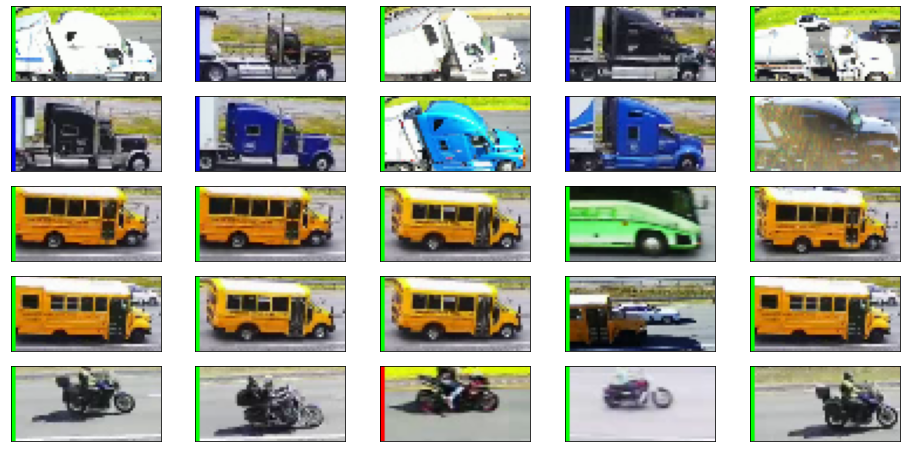

In [ ]:
plot_images("/content/example")

In [ ]:
# OR
from tensorflow.keras.utils import get_file
import os

url = f'https://storage.googleapis.com/{bucket_name}/{file_name}'
path_to_zip = get_file(file_name, origin=url, extract=True)
path = os.path.join(os.path.dirname(path_to_zip), 'example')

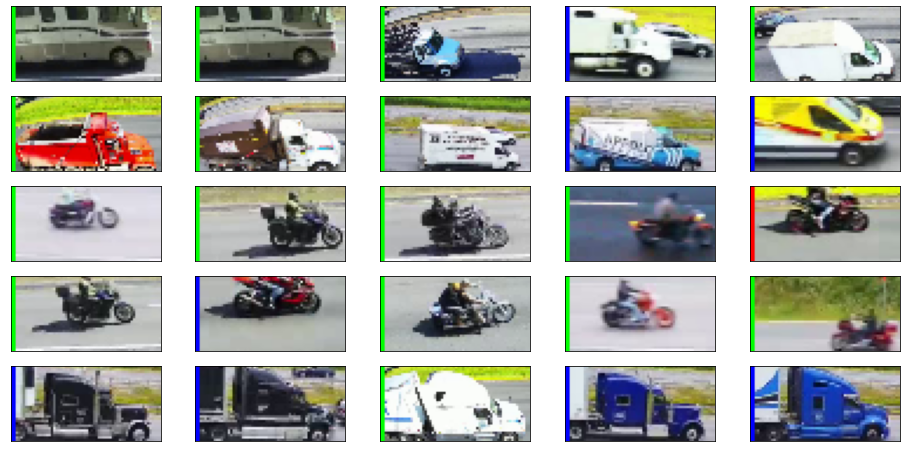

In [8]:
plot_images(path)

## Conclusion
For the best students' experience during labs I would recommend using an external data source method to share the data source in class. I think it will be the most convenient way to distribute the lab material as it will consist only of the notebook itself. The code is clean and doesn't require any extra steps. Also I would recommend an instructor to own the bucket with all lab data sources. 